<a href="https://colab.research.google.com/github/etatc/faces-autoencoder/blob/main/facesautoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl http://vis-www.cs.umass.edu/lfw/lfw.tgz -o data.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  172M  100  172M    0     0  99.0M      0  0:00:01  0:00:01 --:--:-- 99.0M


In [ ]:
!tar -xvzf /content/data.tgz -C /content

In [ ]:
from PIL import Image

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = '/content/lfw'
directories = listdir(mypath)
onlyfiles = []
for dir in directories:
    path = '/content/lfw/' + dir
    for f in listdir(path):
      onlyfiles += [path + '/' + f]

In [ ]:
print(directories)

['Eloy_Gutierrez', 'Cliff_Ellis', 'Benazir_Bhutto', 'Bryan_Cooley', 'Diego_Colorado', 'Jose_Dirceu', 'Nate_Blackwell', 'Dan_Guerrero', 'Kevin_Hearn', 'Andrea_Kiser', 'Dennis_Hastert', 'Eduard_Shevardnadze', 'Jonathan_Schroeder', 'Magdalena_Maleeva', 'Taha_Yassin_Ramadan', 'James_Smith', 'William_Ford_Jr', 'Rodrigo_de_la_Cerna', 'Lauren_Killian', 'Chakib_Khelil', 'Michelle_Pfeiffer', 'Juergen_Peters', 'Kim_Chinn', 'Rani_Mukherjee', 'John_White', 'Mohammed_Al-Douri', 'Jay_Garner', 'Michael_Bouchard', 'Amanda_Marsh', 'Rena_Sofer', 'Raoul_Ruiz', 'Tippi_Hedren', 'Farouk_al-Sharaa', 'Wallace_Capel', 'Taufik_Kiemas', 'Judy_Locy', 'Jo_Dee_Messina', 'Sandy_Smith', 'Lon_Kruger', 'Ian_Gillan', 'Dave_Lewis', 'Jon_Constance', 'Alex_Zanardi', 'Alex_Wallau', 'Buzz_Hargrove', 'Gary_Marshall', 'Keith_Brown', 'Cristian_Barros', 'Lina_Krasnoroutskaya', 'Bobby_Jackson', 'Kemal_Dervis', 'Jim_Carrey', 'Matt_LeBlanc', 'Madeleine_Webber', 'Rina_Lazo', 'Gary_Williams', 'Jack_LaLanne', 'Rowan_Williams', 'David_

In [ ]:
print(onlyfiles[:50])

['/content/lfw/Eloy_Gutierrez/Eloy_Gutierrez_0001.jpg', '/content/lfw/Cliff_Ellis/Cliff_Ellis_0001.jpg', '/content/lfw/Benazir_Bhutto/Benazir_Bhutto_0005.jpg', '/content/lfw/Benazir_Bhutto/Benazir_Bhutto_0004.jpg', '/content/lfw/Benazir_Bhutto/Benazir_Bhutto_0002.jpg', '/content/lfw/Benazir_Bhutto/Benazir_Bhutto_0003.jpg', '/content/lfw/Benazir_Bhutto/Benazir_Bhutto_0001.jpg', '/content/lfw/Bryan_Cooley/Bryan_Cooley_0001.jpg', '/content/lfw/Diego_Colorado/Diego_Colorado_0001.jpg', '/content/lfw/Jose_Dirceu/Jose_Dirceu_0002.jpg', '/content/lfw/Jose_Dirceu/Jose_Dirceu_0001.jpg', '/content/lfw/Nate_Blackwell/Nate_Blackwell_0001.jpg', '/content/lfw/Dan_Guerrero/Dan_Guerrero_0001.jpg', '/content/lfw/Kevin_Hearn/Kevin_Hearn_0001.jpg', '/content/lfw/Andrea_Kiser/Andrea_Kiser_0001.jpg', '/content/lfw/Dennis_Hastert/Dennis_Hastert_0006.jpg', '/content/lfw/Dennis_Hastert/Dennis_Hastert_0001.jpg', '/content/lfw/Dennis_Hastert/Dennis_Hastert_0005.jpg', '/content/lfw/Dennis_Hastert/Dennis_Hastert_0

In [ ]:
import numpy as np
resized = []
for pic in onlyfiles:
  img = Image.open(pic)
  img = img.resize((200, 200), Image.ANTIALIAS)
  image = np.array(img)
  resized += [image]

In [ ]:
x_train = np.array(resized)

In [ ]:
x_train = x_train.astype('float32') / 255.

In [ ]:
x_train.shape

(13233, 200, 200, 3)

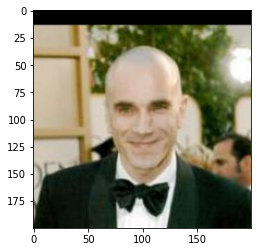

In [ ]:
from matplotlib import image
from matplotlib import pyplot
pyplot.imshow(x_train[6900])
pyplot.show()

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization, Reshape, Input
from keras.models import Sequential, Model
import keras.models as model
from keras import backend as K

In [ ]:
def build_encoder(img_shape):
    # The encoder
    encoder = Sequential()
    encoder.add(Conv2D(100, (3, 3), activation='relu', input_shape=(img_shape)))
    encoder.add(MaxPooling2D((2, 2)))
    encoder.add(Conv2D(50, (3, 3), activation='relu', padding='same'))
    encoder.add(MaxPooling2D((2, 2),  padding='same'))
    encoder.add(Conv2D(25, (3, 3), activation='relu', padding='same'))
    encoder.add(MaxPooling2D((2, 2),  padding='same'))
    encoded = encoder.layers[5].output
    
    '''= K.function([encoder.layers[0].input],
                                  [encoder.layers[3].output])
    encoded = o([x])[0]
    '''
    return encoder, encoded

def build_decoder(img_shape):
    # The decoder
    decoder = Sequential()
    decoder.add(Conv2DTranspose(25, (3, 3), strides=2, activation='relu', padding='same', input_shape=(img_shape)))
    decoder.add(Conv2DTranspose(50, (3, 3), strides=2, activation='relu', padding='same'))
    decoder.add(Conv2DTranspose(100, (3, 3), strides=2, activation='relu', padding='same'))
    decoder.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
    #decoder.add(Reshape((100, 100, 3)))
    decoded = decoder.layers[2].output

    return decoder, decoded

In [ ]:
img_shape = x_train.shape[1:]
encoder, encoded = build_encoder(img_shape)

decoder, decoded = build_decoder(encoded.shape[1:])

inp = Input(img_shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 25, 25, 25)        59125     
_________________________________________________________________
sequential_1 (Sequential)    (None, 200, 200, 3)       64753     
Total params: 123,878
Trainable params: 123,878
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
autoencoder.load_weights('autoencoderfaces200.h5')

OSError: ignored

In [ ]:






}\               shuffle=True,
                validation_data=(x_train, x_train))

Epoch 1/100
133/133 [==============================] - 172s 1s/step - loss: 0.0557 - val_loss: 0.0103
Epoch 2/100
133/133 [==============================] - 137s 1s/step - loss: 0.0088 - val_loss: 0.0049
Epoch 3/100
133/133 [==============================] - 139s 1s/step - loss: 0.0047 - val_loss: 0.0046
Epoch 4/100
133/133 [==============================] - 139s 1s/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/100
133/133 [==============================] - 139s 1s/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/100
133/133 [==============================] - 139s 1s/step - loss: 0.0037 - val_loss: 0.0033
Epoch 7/100
133/133 [==============================] - 139s 1s/step - loss: 0.0035 - val_loss: 0.0037
Epoch 8/100
133/133 [==============================] - 139s 1s/step - loss: 0.0034 - val_loss: 0.0031
Epoch 9/100
133/133 [==============================] - 139s 1s/step - loss: 0.0032 - val_loss: 0.0032
Epoch 10/100
133/133 [==============================] - 139s 1s/step - loss: 0.003

In [ ]:
autoencoder.save(autoencodefaces200.h5)